In [ ]:
%load_ext autoreload
%autoreload 2
from src.utils.video2npy import iterate_and_process_videos
from main import iterate_folders_and_process
import torch

In [3]:
torch.cuda.empty_cache() 
torch.manual_seed(42)
if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU in use: {gpu_name}")

    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("No GPU found or GPU is not being utilized.")

GPU in use: NVIDIA GeForce RTX 3080 Laptop GPU
GPU 0: NVIDIA GeForce RTX 3080 Laptop GPU


### Pendulum

In [21]:
video_path = "./data/"
iterate_and_process_videos(video_path)

Processing video: ./data/pendulum_45_2.mp4
Saving numpy array to: ./data/pendulum_45_2.npy
---------------------------------------------------------
Original video fps: 59.94
number of frames: (644, 56, 100)
Time between frames: 0.1 
Shape of dataset: (584, 10, 1, 56, 100)
---------------------------------------------------------


Processing ./data/pendulum_45_2.npy...
Found dynamics keyword: pendulum
Current dynamics: pendulum


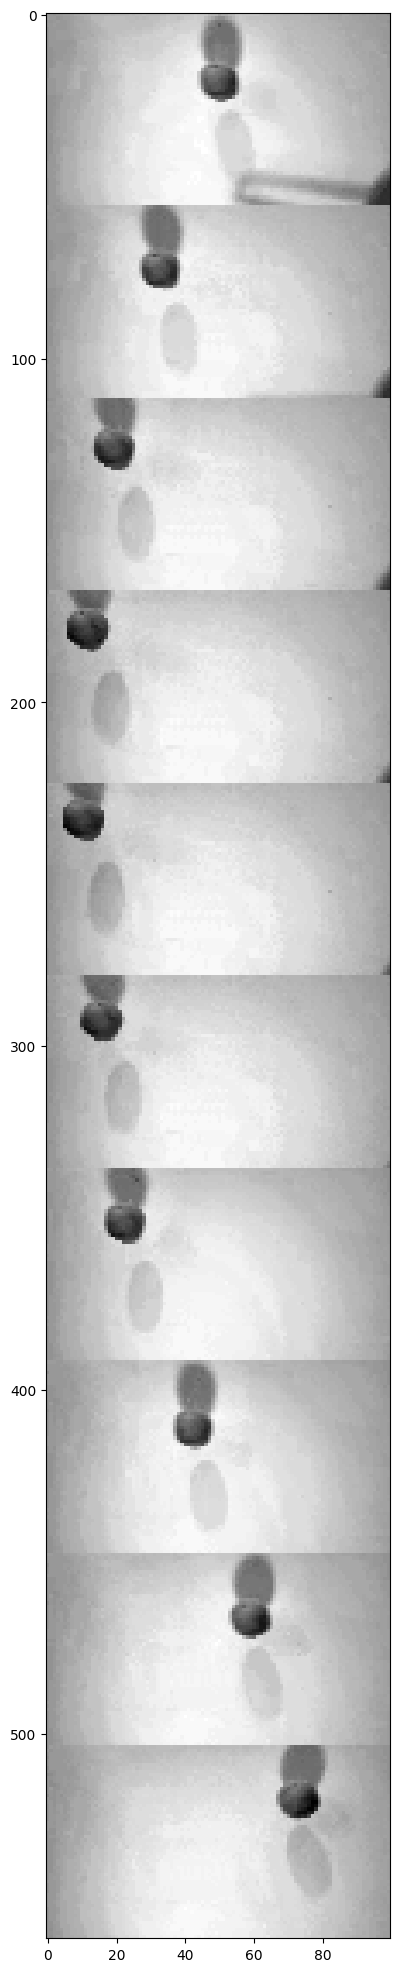

Data shape:  (584, 10, 1, 56, 100)
Data range: 
Min:  0.24705882352941178 
Max:  0.6274509803921569
dt 0.1
Using device: cuda


alpha,█▂▁▁▂▂▂▂▃▃▂▂▃▁▁▁▁▁▁▂▂▂▂▂▂▂▃▂▁▂▂▂▂▂▃▂▁▁▁▁
beta,▁▆▄▅▅▅▅▆▅▅▅▅▅▆▆▆▆▇▇▇▇▇███▇██████████████
train_loss,█▅▃▂▂▂▂▂▂▂▂▂▃▂▁▁▁▁▁▁▂▃▁▁▁▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁
validation_loss,▃▂▂▂▂▂▁▁▁▁▁▁█▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
alpha,-8.12524
beta,19.11754
train_loss,0.45983
validation_loss,0.67719


Initial Loss 	 training loss: 5.579565525054932 	 validation loss: 5.403127193450928
epoch: 50 	 training loss: 0.9129775762557983 	 validation loss: 1.068960428237915
epoch: 100 	 training loss: 0.7650207132101059 	 validation loss: 0.8280141353607178
epoch: 150 	 training loss: 0.6929379850625992 	 validation loss: 0.6015702486038208
epoch: 200 	 training loss: 0.23499947041273117 	 validation loss: 0.25303781032562256
epoch: 250 	 training loss: 0.6163892969489098 	 validation loss: 0.8399280905723572
epoch: 300 	 training loss: 0.07555175758898258 	 validation loss: 0.10933703184127808
epoch: 350 	 training loss: 0.06094061629846692 	 validation loss: 0.14881446957588196
epoch: 400 	 training loss: 0.020355033222585917 	 validation loss: 0.06898503005504608
epoch: 450 	 training loss: 0.01899160910397768 	 validation loss: 0.06888102740049362
epoch: 500 	 training loss: 0.049587040208280087 	 validation loss: 0.0759342834353447
best model a 0.41086307168006897
best last a 0.3938998

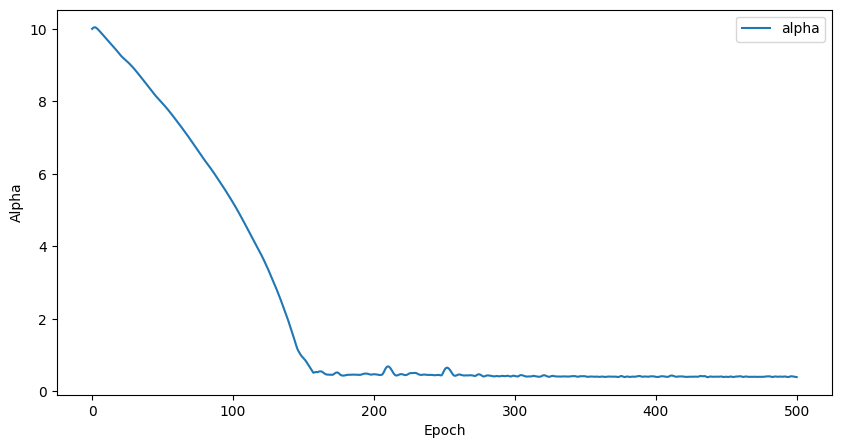

z2_encoder.shape:  torch.Size([1, 10, 1])


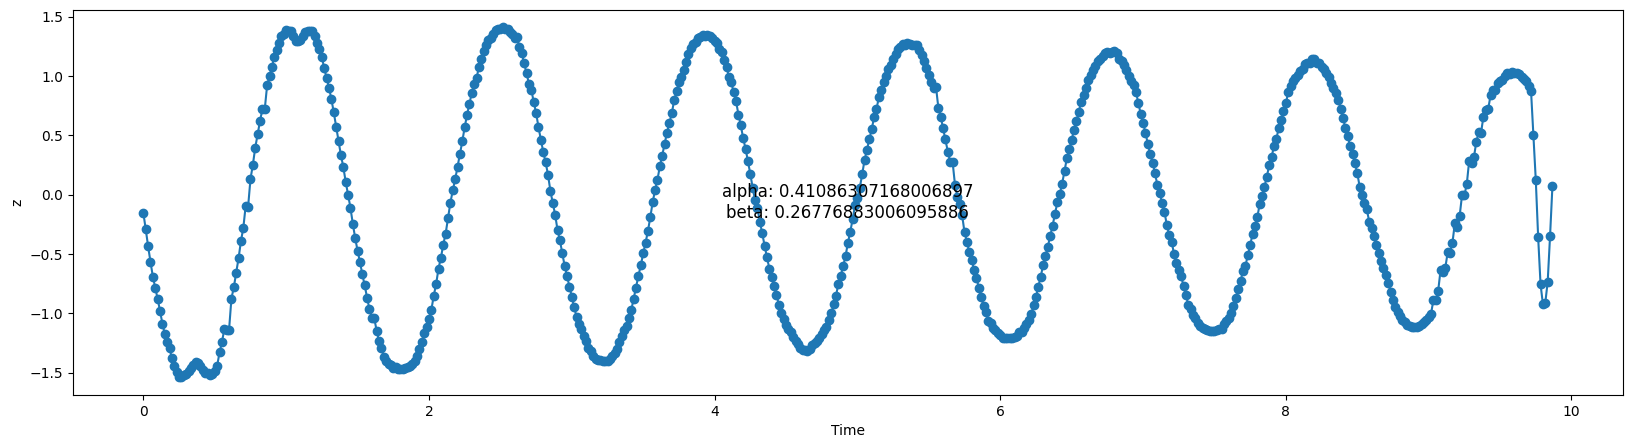

Data successfully written to output


In [ ]:
data_folder = "./data/"
iterate_folders_and_process(data_folder, output_folder='output', dt = 0.1)

In here the Expected parameter is $\alpha_{Real} = 0.45 m$ and the predicte by the model is $\alpha_{model} = 0.41m $

### Torricelli and Renormalization

In [8]:
video_path = "./data_torricelli/"
iterate_and_process_videos(video_path)


Processing video: ./data_torricelli/video.mp4
Saving numpy array to: ./data_torricelli/video.npy
---------------------------------------------------------
Original video fps: 60.0
number of frames: (1545, 56, 100)
Time between frames: 0.1 
Shape of dataset: (1485, 10, 1, 56, 100)
---------------------------------------------------------



---
- **Time step**
  - We use \(dt = 0.1\):
    ```python
    iterate_folders_and_process(data_folder, output_folder="output", dt=0.1)
    ```
  > _Note:_ This sets the integrator time step used during preprocessing.

- **KL loss (stability)**
  - To avoid taking the square root of negative values, choose a KL loss (or clamp inputs) so `sqrt(·)` never receives a negative argument.
  - Edit `src/loss_func.py` at **line 36**.
  - ![KL-loss screenshot](attachment:image.png)
  > _Tip:_ Example safeguard: `x = x.clamp_min(1e-8)` before `torch.sqrt(x)`.

- **Physics learning rate**
  - Set the learning rate for physics parameters to \(lr_{\text{phys}} = 0.01\).
  - Edit `./main.py` at **line 168**.

---



Processing ./data_torricelli/video.npy...
Found dynamics keyword: torricelli
Current dynamics: torricelli


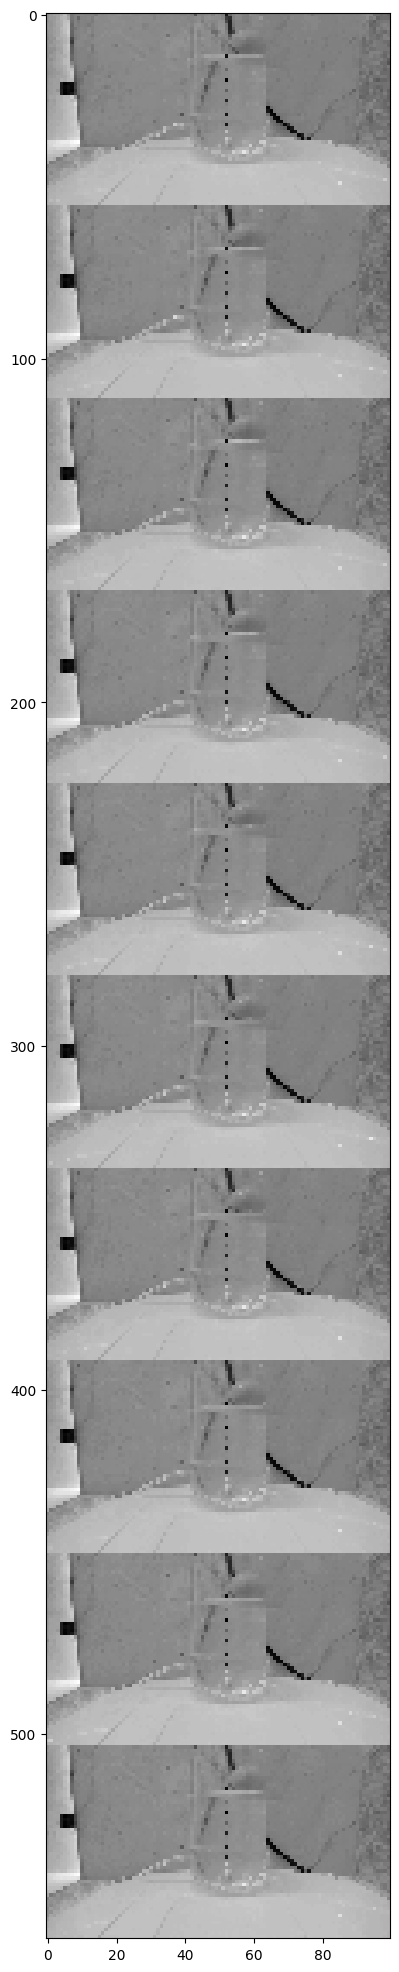

Data shape:  (1485, 10, 1, 56, 100)
Data range: 
Min:  0.0 
Max:  0.9137254901960784
dt 0.1
Using device: cuda


alpha,██▇▇▇▆▆▆▅▅▄▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▄▃▃▃▃▃▃▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation_loss,█▅▅▅▅▄▃▄▄▆▄▃▂▂▂▁▃▃▂▃▃▂▂▂▂▃▃▃▃▃▅▅▁▆▇█▆▁▆▇
alpha,0.05675
train_loss,0.01577
validation_loss,5.68084


Initial Loss 	 training loss: 8.29369535446167 	 validation loss: 8.669126510620117
epoch: 50 	 training loss: 1.2270564794540406 	 validation loss: 4.421812534332275
epoch: 100 	 training loss: 0.9332045078277588 	 validation loss: 4.217727343241374
epoch: 150 	 training loss: 0.7324990630149841 	 validation loss: 3.5342026551564536
epoch: 200 	 training loss: 0.03454475635662675 	 validation loss: 2.860337734222412
epoch: 250 	 training loss: 0.06565441209822893 	 validation loss: 3.286376158396403
epoch: 300 	 training loss: 0.05858774126973003 	 validation loss: 3.0350070794423423
epoch: 350 	 training loss: 0.015935060568153858 	 validation loss: 3.932139237721761
epoch: 400 	 training loss: 0.03770021488890052 	 validation loss: 4.399085998535156
epoch: 450 	 training loss: 0.018202591734007 	 validation loss: 3.3768985271453857
epoch: 500 	 training loss: 0.015771276340819894 	 validation loss: 5.680844942728679
best model a 0.055115170776844025
best last a 0.05674787983298302
b

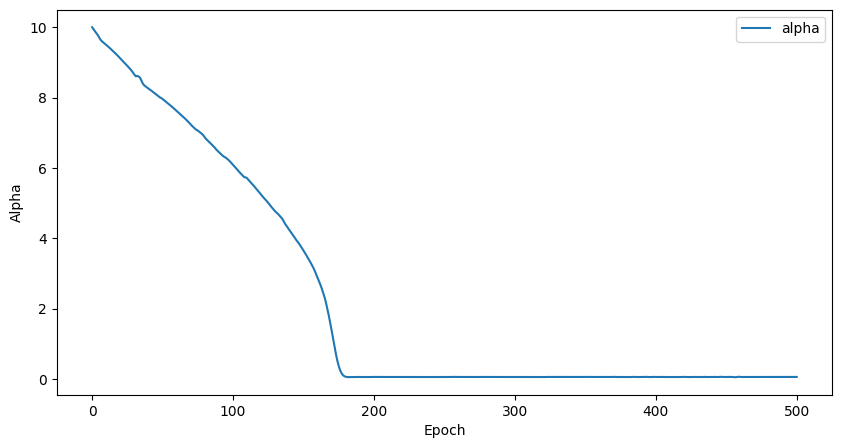

z2_encoder.shape:  torch.Size([1, 10, 1])


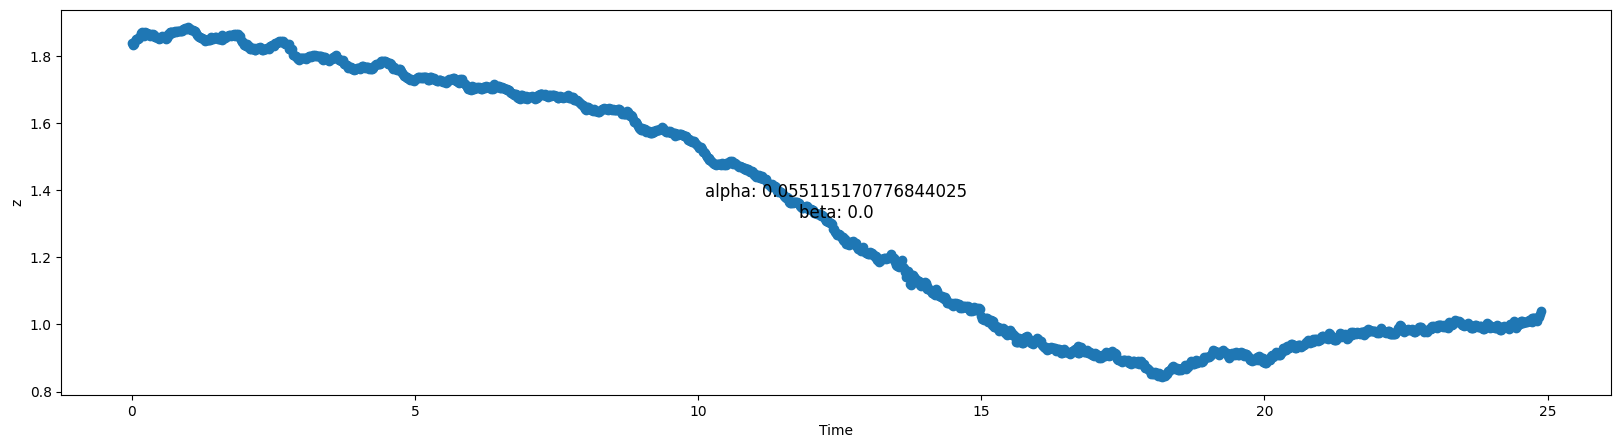

Data successfully written to output


In [7]:
data_folder = "./data_torricelli/"
iterate_folders_and_process(data_folder, output_folder='output', dt = 0.1)

For this experiment the expected value of parameter is:

$$
\alpha_{real} = 0.0012 \; \frac{\sqrt{m}}{s^2}
$$

However, the model does not use these units.  
It predicts instead:

$$
\alpha_{model} = 0.05 \; \frac{\sqrt{U}}{s^2}
$$

---


The predicted variable $y_U$ and the real variable $y_m$ have different ranges:

$$
y_U \in [P_{\min}, P_{\max}] = [0.8, 1.8], \quad
y_m \in [R_{\min}, R_{\max}] = [0.01, 0.07].
$$

To convert between model and real units we define a **conversion factor**:

$$
F = \sqrt{\frac{P_{\max} - P_{\min}}{R_{\max} - R_{\min}}}.
$$

Numerically:

$$
F = \sqrt{\frac{1.8 - 0.8}{0.07 - 0.01}}
= \sqrt{\frac{1.0}{0.06}}
\approx 4.082.
$$

---

#### Rescaled parameter

Since $\alpha$ multiplies $\sqrt{y}$ in the model equation, the real parameter is obtained by dividing by $F$:

$$
\alpha_{real} = \frac{\alpha_{model}}{F}.
$$

Therefore:

$$
\alpha_{real} = \frac{0.05}{4.082} \;\frac{\sqrt{m}}{s^2}
\approx 0.0122 \;\frac{\sqrt{m}}{s^2}.
$$

---

✅ This renormalization ensures that the parameter estimated in model units ($\sqrt{U}/s^2$) is properly expressed in real physical units ($\sqrt{m}/s^2$).


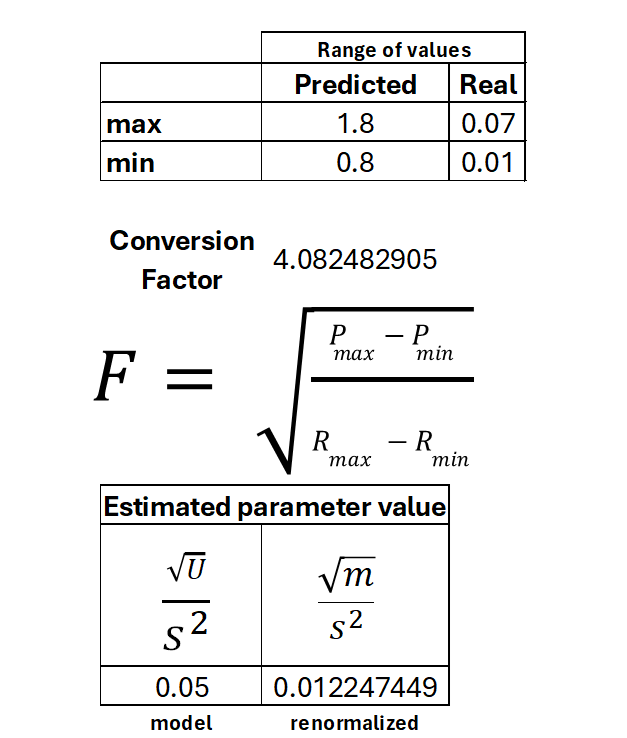